# Notebook for section 3.3

In [1]:
%matplotlib inline
import src.lfw_dataset as lfw
from src.lfw_dataset import LFWDataLoader
from src.siamese import Siamese

# load the paths of the data sets
same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, same_test_paths, diff_test_paths = lfw.load_data()

def try_train(siamese_net, epochs=100, epoch_shuffle=True, verbose=0):
    """
    Try to train the siamese_net model. If success, return train history. Otherwise, return None.
    """
    try:
        print("Training...")
        start_time = datetime.now()
        history = siamese_net.train(same_train_paths, diff_train_paths, same_val_paths, diff_val_paths, epochs=epochs, epoch_shuffle=epoch_shuffle, verbose=verbose)
        end_time = datetime.now()
        print("Training End")
        print('The training took: {}'.format(end_time-start_time))
        return history
    except Exception as e:
        print(f"Got exception while training: {type(e).__name__}")
        return None

Using TensorFlow backend.


Data already exist


# VGG16

Model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 2048)         20094784    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 2048)         0           sequential_1[1][0]               
   

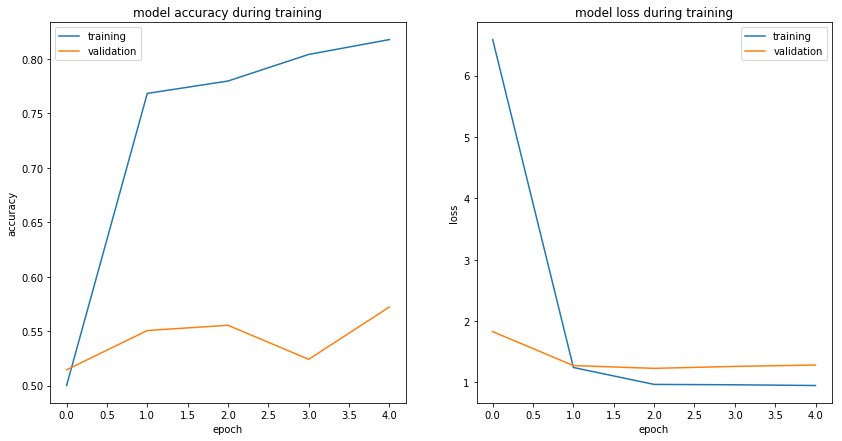

In [2]:
s_net = Siamese()
s_net.build('vggface', dense_size_1=2048, pre_trained_model='vgg16' )
print("Model:")
s_net.model.summary()

history = try_train(s_net, epochs=5, verbose=1)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)

# RESNET50 

Model:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 2048)         41247680    input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 2048)         0           sequential_2[1][0]               
   

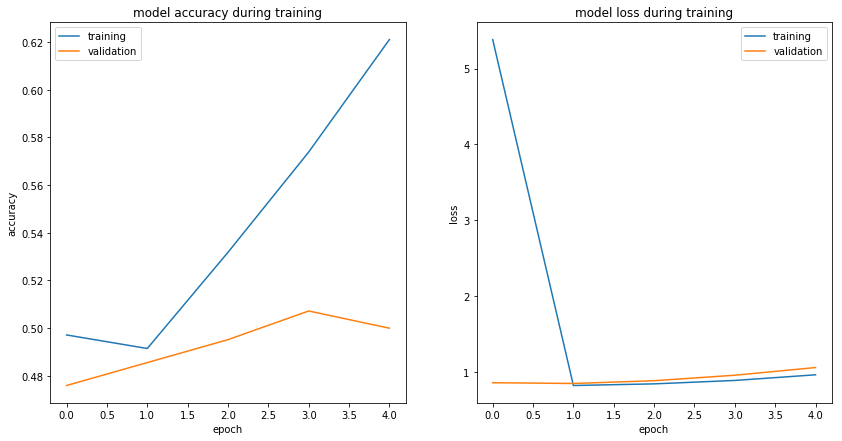

In [3]:
s_net = Siamese()
s_net.build('vggface', dense_size_1=2048, pre_trained_model='resnet50')
print("Model:")
s_net.model.summary()
    
history = try_train(s_net, epochs=5, verbose=1)
if history:
    s_net.evaluate(history, same_test_paths, diff_test_paths)